In [1]:
# Import Imp. Libraries 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Load Data Set 

In [2]:
df=pd.read_csv('datasets_13720_18513_insurance(1).csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
df.shape

(1338, 7)

In [9]:
df.head() #Showinf Top Raw

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Data Visualisation 

<Axes: xlabel='age', ylabel='Count'>

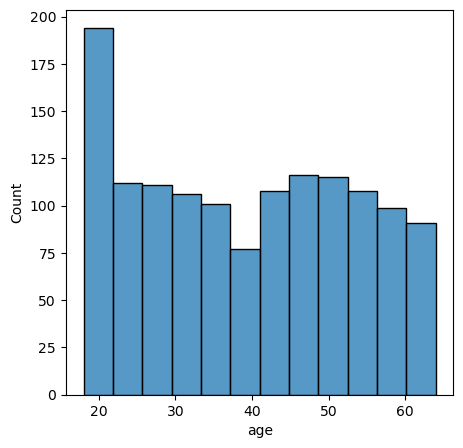

In [10]:
plt.figure(figsize=(5, 5))
sns.histplot(data=df,x='age')

<Axes: xlabel='sex', ylabel='count'>

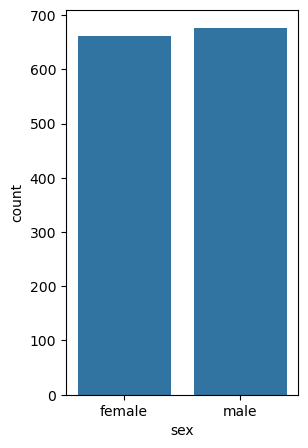

In [11]:
plt.figure(figsize=(3, 5))
sns.countplot(data=df,x='sex')

In [12]:
df['sex'].value_counts() #Also we check sex value count in the data set

sex
male      676
female    662
Name: count, dtype: int64

<Axes: xlabel='bmi', ylabel='Count'>

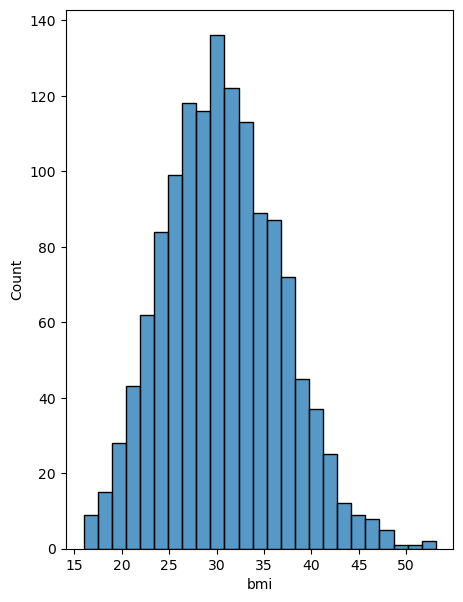

In [13]:
plt.figure(figsize=(5,7))
sns.histplot(data=df,x='bmi')

In [14]:
df['bmi'].value_counts() # also we check count value for bmi.

bmi
32.300    13
28.310     9
30.495     8
30.875     8
31.350     8
          ..
46.200     1
23.800     1
44.770     1
32.120     1
30.970     1
Name: count, Length: 548, dtype: int64

<Axes: xlabel='smoker', ylabel='Count'>

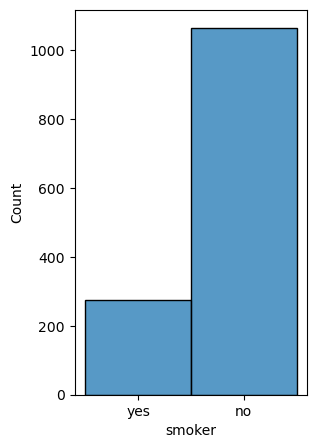

In [15]:
plt.figure(figsize=(3,5))
sns.histplot(data=df,x='smoker')

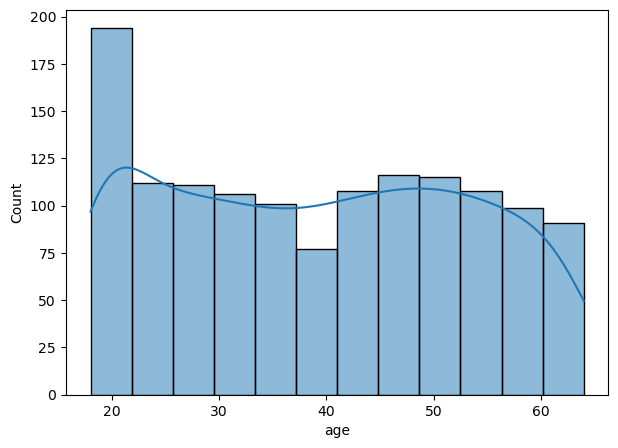

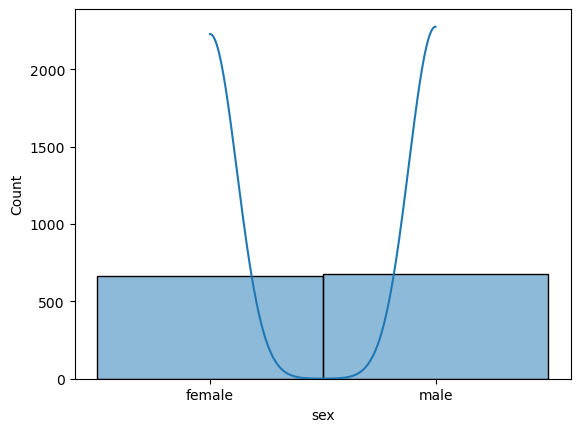

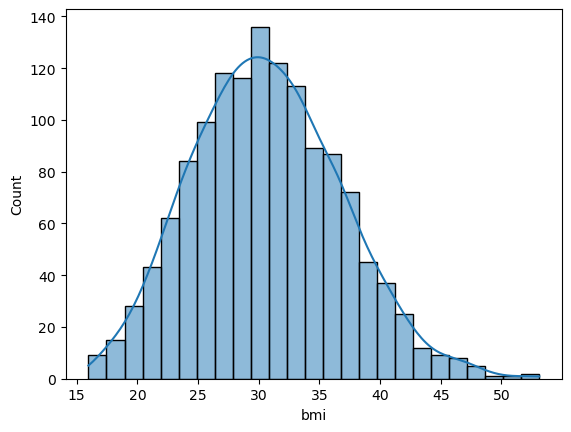

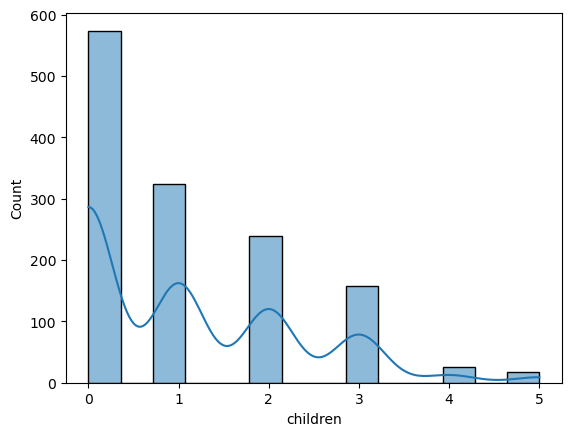

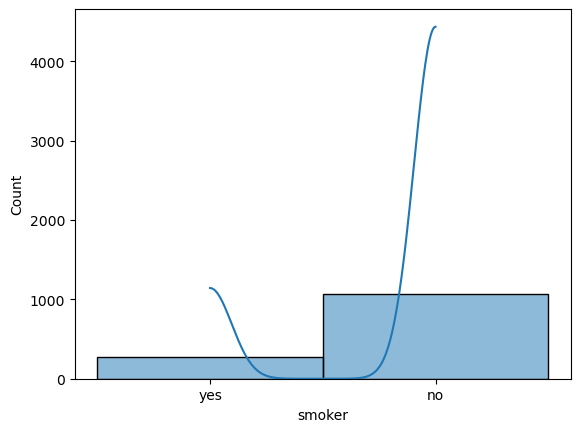

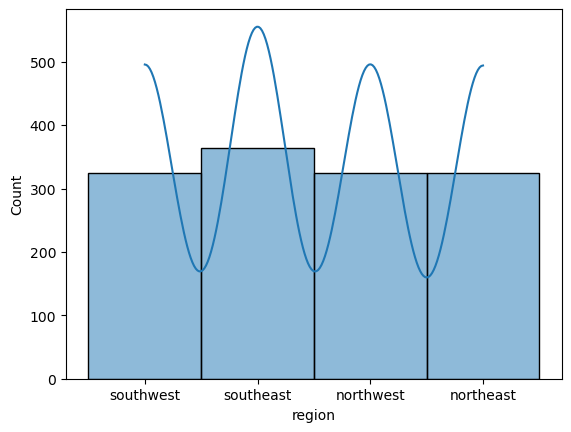

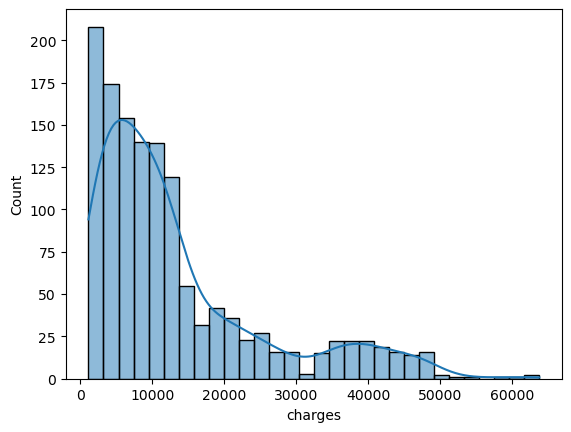

In [16]:
plt.figure(figsize=(7,5))
for column in df.columns:
    sns.histplot(x=df[column],kde=True)
    plt.xlabel(column,fontsize=10)
    plt.show()

# Convert the categorical column to Numerical 

In [18]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [19]:
df['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [20]:
df.replace({'sex':{'male':0,'female':1}},inplace=True)
df.replace({'smoker':{'yes':0,'no':1}},inplace=True)
df.replace({'region':{'southeast':0,'southwest':1,'northwest':2,'northeast':3}},inplace=True)

In [21]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,2,21984.47061
4,32,0,28.880,0,1,2,3866.85520


# Model Creation 

In [22]:
# Train & test 
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [23]:
#x= df[['age', 'sex', 'bmi', 'children', 'smoker', 'region']]
#y= ['charges']

In [24]:
x=df.drop('charges',axis=1)
y=df['charges']

In [25]:
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.25, random_state=42)

In [26]:
x_test.shape #checking the data in for test 

(335, 6)

In [27]:
x_train.shape #checking the data in for train 

(1003, 6)

In [28]:
# Pred. Analysis 
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred=lr.predict(x_test)

In [29]:
y_pred

array([ 8870.43720414,  7052.20028082, 36887.03501198,  9510.69606004,
       26982.25684841, 11115.60566489,    82.85757964, 17048.95840427,
         918.74651755, 11293.63997604, 28261.86910457,  9441.32105688,
        4946.02751831, 38251.159446  , 40114.34695726, 36920.39273812,
       15025.60229327, 35660.29369279,  8828.57323047, 31441.73107467,
        4003.08325365, 10360.54763414,  2533.88176918,  7046.66393411,
       11312.98529698, 12912.71343334, 14723.73322237,  6127.17906484,
        9875.34887922,  1900.52241469,  9263.68710751, 13113.49853158,
        4247.20487587,  3338.79675995,  4638.80713253, 13055.99859291,
        2068.29993253,  8967.35286457, 33261.56340127, 32365.40432137,
        4005.82589478,  4347.65103525, 14351.75471989, 11505.33877932,
        8557.22100158, 12342.53560026,  5247.35106742,  3241.49637019,
       35295.94934346,  8939.57629836, 15625.83040601,  2064.07616312,
       12406.22391757,  1386.30504975, 13217.98250594, 12579.08348191,
      

In [30]:
r2_score(y_test,y_pred)

0.7673698638169364

# Model Performance 
# The Linear Regression model achieved an R² Score of around 0.75–0.77, which is a decent baseline.

